In [71]:
import sys
sys.path.append('..')

from tqdm import tqdm
from src.datasets.get_datasets import get_datasets
from src.utils.get_model_and_data import get_model_and_data
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
%matplotlib inline

In [34]:
parameters = {'device': 'cpu'}
datasets = get_datasets(parameters, lambda x: x)

loading annotations into memory...
Done (t=22.00s)
creating index...
index created!
loading annotations into memory...
Done (t=1.14s)
creating index...
index created!
train set scale: 21391
loading annotations into memory...
Done (t=0.47s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
val set scale: 925


In [95]:
# fn = np.array
# fn([1,2])
heatmap_dict = {}
cnt_dict = {}

dataset = datasets['train']
for i in tqdm(range(len(dataset))):
    _, target, _ = dataset[i]
    for obj in target:
        if obj['category_name'] not in heatmap_dict:
            heatmap_dict[obj['category_name']] = np.zeros([224, 224])
            cnt_dict[obj['category_name']] = 0

        bbox_x, bbox_y, bbox_w, bbox_h = [int(c*224) for c in obj['bbox']]      
#         print(heatmap_dict[obj['category_name']])
        heatmap_dict[obj['category_name']][bbox_y:bbox_y+bbox_h, bbox_x:bbox_x+bbox_w] += 1
        cnt_dict[obj['category_name']] += 1
    
#     break

100%|██████████████████████████████████████████████████████████████████| 21391/21391 [06:49<00:00, 52.23it/s]


100%|████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 32.14it/s]


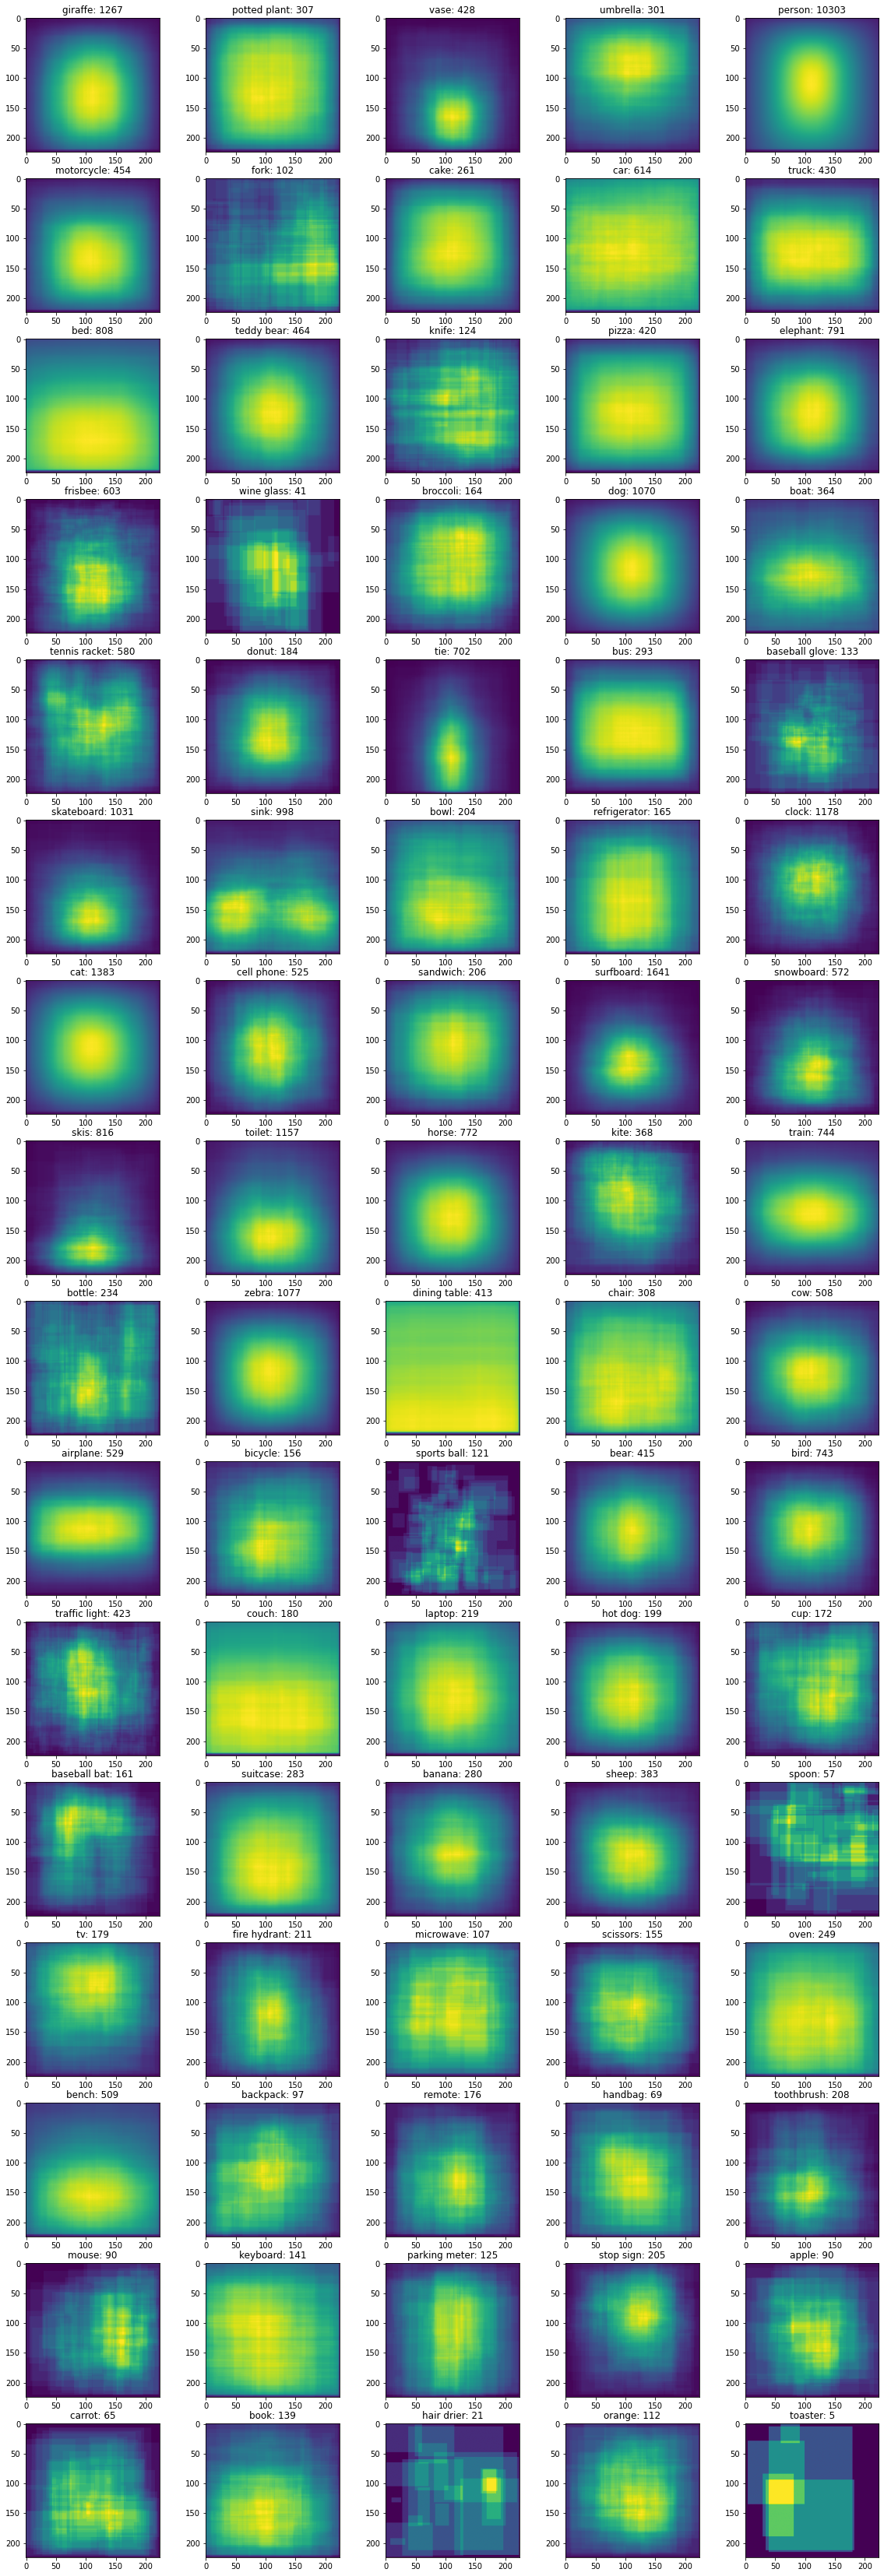

In [96]:
heatmap_dict.keys()
plt.figure(figsize=(20,60))
for i, (k, v) in enumerate(tqdm(heatmap_dict.items())):
    plt.subplot(16, 5, i+1)
    plt.imshow(v)
    plt.title(f'{k}: {cnt_dict[k]}')
# plt.subplot(1,2,1)
# plt.imshow(heatmap_dict['person'])
# plt.colorbar()
# plt.subplot(1,2,2)
# plt.imshow(heatmap_dict['skis'])

# plt.colorbar()